In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 讀取資料集以及做前處理的函數
def load_data(dirname):
    # 讀取 csv 文件
    data = pd.read_csv(dirname)
    # 過濾有缺失值的 row
    data = data.dropna()

    # 將圖片像素值讀取為 numpy array 的形態
    data['Image'] = data['Image'].apply(lambda img: np.fromstring(img, sep=' ')).values 

    # 單獨把圖像 array 抽取出來
    imgs = np.vstack(data['Image'].values)/255
    # reshape 為 96 x 96
    imgs = imgs.reshape(data.shape[0], 96, 96)
    # 轉換為 float
    imgs = imgs.astype(np.float32)
    
    # 提取坐標的部分
    points = data[data.columns[:-1]].values

    # 轉換為 float
    points = points.astype(np.float32)

    # normalize 坐標值到 [-0.5, 0.5]
    points = points/96 - 0.5
    
    return imgs, points

In [2]:
# 讀取資料
imgs_train, points_train = load_data(dirname = 'training.csv')
print("圖像資料:", imgs_train.shape, "\n關鍵點資料:", points_train.shape)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 回傳定義好的 model 的函數
def get_model():
    # 定義人臉關鍵點檢測網路
    model = Sequential()

    # 定義神經網路的輸入
    model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    # 最後輸出 30 維的向量，也就是 15 個關鍵點的值
    model.add(Dense(30))
    return model

圖像資料: (2140, 96, 96) 
關鍵點資料: (2140, 30)


Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:496: FutureWarning: Passing (type, 1) or '1type

In [3]:
model = get_model()
# 配置 loss funtion 和 optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# 印出網路結構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
__________

Train on 1712 samples, validate on 428 samples
Epoch 1/150
1712/1712 [==============================] - 19s 11ms/step - loss: 0.0060 - val_loss: 0.0021

Epoch 00001: val_loss improved from inf to 0.00209, saving model to best_weights.h5
Epoch 2/150
1712/1712 [==============================] - 19s 11ms/step - loss: 0.0016 - val_loss: 0.0019

Epoch 00002: val_loss improved from 0.00209 to 0.00193, saving model to best_weights.h5
Epoch 3/150
1712/1712 [==============================] - 28s 16ms/step - loss: 0.0013 - val_loss: 0.0019

Epoch 00003: val_loss improved from 0.00193 to 0.00186, saving model to best_weights.h5
Epoch 4/150
1712/1712 [==============================] - 20s 12ms/step - loss: 0.0012 - val_loss: 0.0019

Epoch 00004: val_loss did not improve from 0.00186
Epoch 5/150
1712/1712 [==============================] - 19s 11ms/step - loss: 0.0011 - val_loss: 0.0018

Epoch 00005: val_loss improved from 0.00186 to 0.00176, saving model to best_weights.h5
Epoch 6/150
1712/1712 [=

1712/1712 [==============================] - 19s 11ms/step - loss: 1.9242e-04 - val_loss: 7.9968e-04

Epoch 00045: val_loss did not improve from 0.00079
Epoch 46/150
1712/1712 [==============================] - 19s 11ms/step - loss: 1.8499e-04 - val_loss: 7.9918e-04

Epoch 00046: val_loss did not improve from 0.00079
Epoch 47/150
1712/1712 [==============================] - 19s 11ms/step - loss: 1.8783e-04 - val_loss: 8.1761e-04

Epoch 00047: val_loss did not improve from 0.00079
Epoch 48/150
1712/1712 [==============================] - 24s 14ms/step - loss: 1.8627e-04 - val_loss: 8.0151e-04

Epoch 00048: val_loss did not improve from 0.00079
Epoch 49/150
1712/1712 [==============================] - 24s 14ms/step - loss: 1.8299e-04 - val_loss: 8.2720e-04

Epoch 00049: val_loss did not improve from 0.00079
Epoch 50/150
1712/1712 [==============================] - 18s 10ms/step - loss: 1.7945e-04 - val_loss: 8.3483e-04

Epoch 00050: val_loss did not improve from 0.00079
Epoch 51/150
1712


Epoch 00093: val_loss did not improve from 0.00076
Epoch 94/150
1712/1712 [==============================] - 21s 12ms/step - loss: 1.1701e-04 - val_loss: 7.9057e-04

Epoch 00094: val_loss did not improve from 0.00076
Epoch 95/150
1712/1712 [==============================] - 20s 12ms/step - loss: 1.1742e-04 - val_loss: 7.6218e-04

Epoch 00095: val_loss improved from 0.00076 to 0.00076, saving model to best_weights.h5
Epoch 96/150
1712/1712 [==============================] - 21s 12ms/step - loss: 1.1745e-04 - val_loss: 7.6775e-04

Epoch 00096: val_loss did not improve from 0.00076
Epoch 97/150
1712/1712 [==============================] - 22s 13ms/step - loss: 1.1208e-04 - val_loss: 7.5517e-04

Epoch 00097: val_loss improved from 0.00076 to 0.00076, saving model to best_weights.h5
Epoch 98/150
1712/1712 [==============================] - 20s 12ms/step - loss: 1.1493e-04 - val_loss: 7.9669e-04

Epoch 00098: val_loss did not improve from 0.00076
Epoch 99/150
1712/1712 [====================

1712/1712 [==============================] - 18s 11ms/step - loss: 8.9330e-05 - val_loss: 8.0720e-04

Epoch 00142: val_loss did not improve from 0.00076
Epoch 143/150
1712/1712 [==============================] - 18s 11ms/step - loss: 8.8426e-05 - val_loss: 7.8756e-04

Epoch 00143: val_loss did not improve from 0.00076
Epoch 144/150
1712/1712 [==============================] - 19s 11ms/step - loss: 8.7255e-05 - val_loss: 7.9708e-04

Epoch 00144: val_loss did not improve from 0.00076
Epoch 145/150
1712/1712 [==============================] - 18s 11ms/step - loss: 8.5229e-05 - val_loss: 7.7876e-04

Epoch 00145: val_loss did not improve from 0.00076
Epoch 146/150
1712/1712 [==============================] - 18s 11ms/step - loss: 8.6890e-05 - val_loss: 8.1039e-04

Epoch 00146: val_loss did not improve from 0.00076
Epoch 147/150
1712/1712 [==============================] - 18s 11ms/step - loss: 8.6220e-05 - val_loss: 7.9642e-04

Epoch 00147: val_loss did not improve from 0.00076
Epoch 148/15

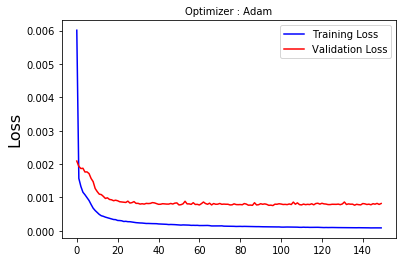

In [4]:
from keras.callbacks import ModelCheckpoint, History
# model checkpoint 
checkpoint = ModelCheckpoint('best_weights.h5', verbose=1, save_best_only=True)
hist = History()


# training the model
hist_model = model.fit(imgs_train.reshape(-1, 96, 96, 1), 
                       points_train, 
                       validation_split=0.2, batch_size=64, callbacks=[checkpoint, hist],
                       shuffle=True, epochs=150, verbose=1)
# save the model weights
model.save_weights('weights.h5')
# save the model
model.save('model.h5')


# loss 值的圖
plt.title('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist_model.history['loss'], color='b', label='Training Loss')
plt.plot(hist_model.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')